# Seaborn Intro

In [1]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

## Install and Import Seaborn

In [2]:
import seaborn as sns

In [4]:
# only get data analyst jobs in the US
df_DA_US = df[
    (df['job_title_short'] == 'Data Analyst') &
    (df['job_country'] == 'United States')
].copy()

# remove NaN values from salary year avg
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

# Plot bar charts with Seaborn

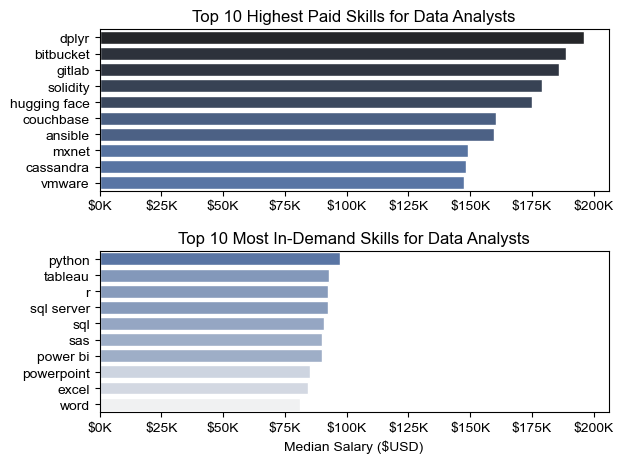

In [ ]:
df_DA_US = df_DA_US.explode('job_skills')

# df_DA top 10 paid skills
df_DA_top_pay = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='median', ascending=False)

df_DA_top_pay = df_DA_top_pay.head(10)

# df_DA top 10 demand skills
df_DA_skills = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='count',ascending=False)
df_DA_skills = df_DA_skills.head(10).sort_values(by='median',ascending=False)

fig, ax = plt.subplots(2,1)

#set seaborn theme
sns.set_theme(style='ticks')

# plot df_DA_top_pay
'''
df_DA_top_pay[::-1].plot(
    kind='barh',
    y='median',
    ax=ax[0],
    legend=False
)
'''
# use seaborn.barplot
sns.barplot(
    data=df_DA_top_pay,
    x='median',
    y=df_DA_top_pay.index,
    ax=ax[0],
    hue ='median',
    palette='dark:b_r') # '_r' to reverse colroing

ax[0].legend().remove() # remove legend
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_: f'${int(x/1000)}K'))


# plot df_DA_skills
'''
df_DA_skills[::-1].plot(
    kind='barh',
    y='median',
    ax=ax[1],
    legend=False
)
'''

# use seaborn.barplot
sns.barplot(
    data=df_DA_skills,
    x='median',
    y=df_DA_skills.index,
    ax=ax[1],
    hue ='median',
    palette='light:b'
)

ax[1].legend().remove() # remove legend
ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary ($USD)')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_: f'${int(x/1000)}K'))

plt.tight_layout()
plt.show()

# Plot Histogram with Seaborn

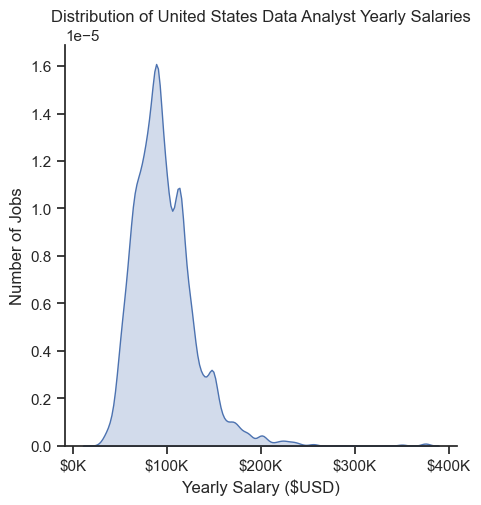

In [32]:
'''
df_DA_US['salary_year_avg'].plot(
    kind='hist',
    bins=30,
    edgecolor='black'
)
'''
# set theme
sns.set_theme(style='ticks')

# use seaborn to plot histogram
sns.displot(
    df_DA_US['salary_year_avg'],
    kind = 'kde',
    fill=True
    )

plt.title('Distribution of United States Data Analyst Yearly Salaries')
plt.xlabel('Yearly Salary ($USD)')
plt.ylabel('Number of Jobs')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
plt.show()

# Plot Boxplot with Seaborn

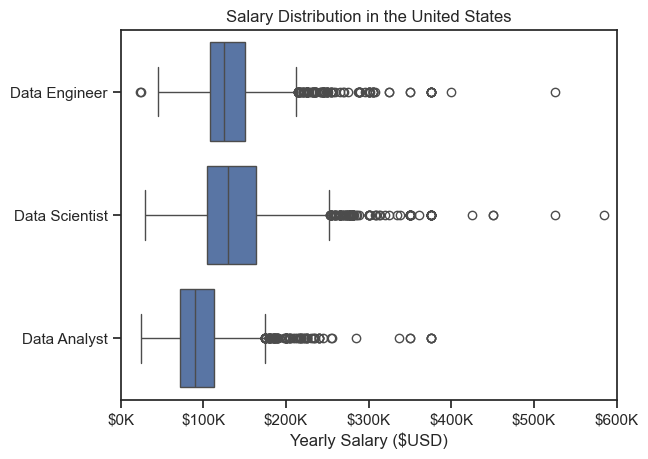

In [35]:
# matplotlib to plot
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

# filter the data to appropriate job titles
df_US = df[
    (df['job_country'] == 'United States') &
    (df['job_title_short']).isin(job_titles)
].copy()

df_US = df_US.dropna(subset=['salary_year_avg'])

job_list = [df_US[df_US['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]
'''
plt.boxplot(job_list, labels=job_titles, vert=False)
'''
# use seaborn to plot boxplot
sns.boxplot(
    data=df_US,
    x='salary_year_avg',
    y='job_title_short'
    )

plt.title('Salary Distribution in the United States')
plt.xlabel('Yearly Salary ($USD)')
plt.ylabel('')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.xlim(0,600000)
plt.show()

# Top Companies Bar Plot

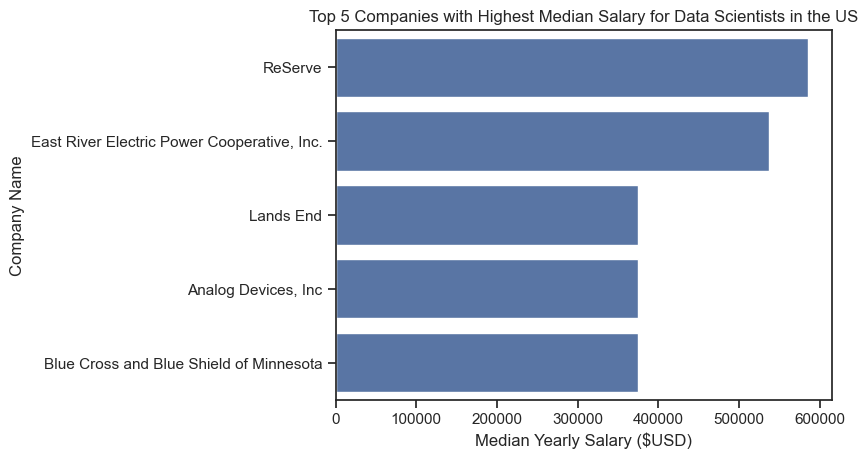

In [79]:
# filter the data to appropriate job titles
df_company = df[
    (df['job_country'] == 'United States') &
    (df['job_title_short'] == 'Data Scientist')
].dropna(subset=['salary_year_avg']).copy()

df_company = df_company.groupby(['company_name'])['salary_year_avg'].median().sort_values(ascending=False)

df_company = df_company.reset_index().head(5)


sns.barplot(
    data=df_company,
    x='salary_year_avg',
    y='company_name',
)

plt.title('Top 5 Companies with Highest Median Salary for Data Scientists in the US')
plt.xlabel('Median Yearly Salary ($USD)')
plt.ylabel('Company Name')
plt.show()

# Data Scientist Salary Histogram

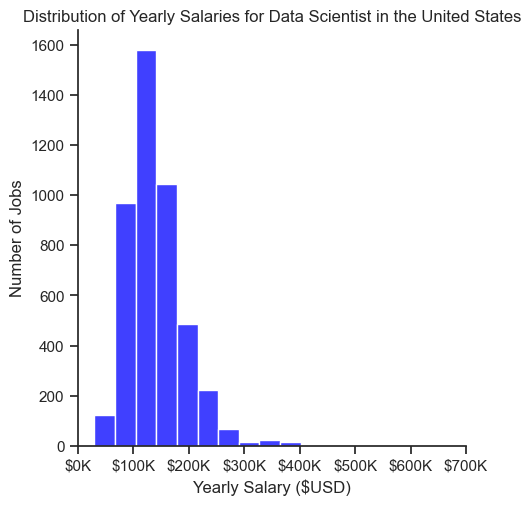

In [85]:
# filter the data to appropriate job titles
df_salary = df[
    (df['job_country'] == 'United States') &
    (df['job_title_short'] == 'Data Scientist')
].dropna(subset=['salary_year_avg']).copy()

sns.displot(
    df_salary['salary_year_avg'],
    bins=25,
    color='blue',
    kde=False
)


plt.title('Distribution of Yearly Salaries for Data Scientist in the United States')
plt.xlabel('Yearly Salary ($USD)')
plt.ylabel('Number of Jobs')
plt.xlim(0,700000)
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
plt.show()

# Data Roles Salary Box Plot

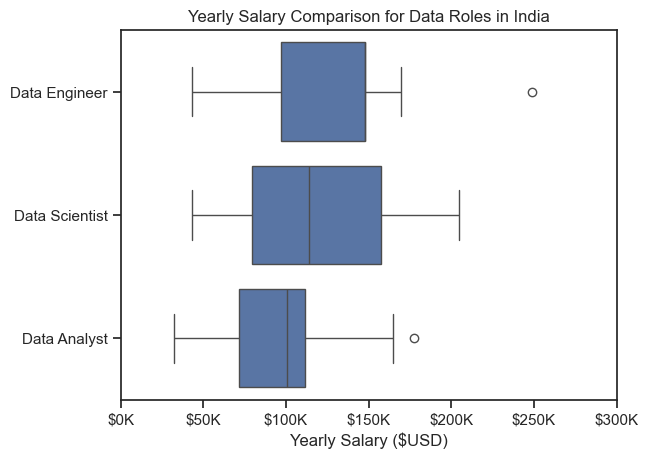

In [96]:
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

india_df = df[
    (df['job_country'] == 'India') &
    (df['job_title_short'].isin(job_titles))
].dropna(subset=['salary_year_avg']).copy()

job_list = [
    india_df[india_df['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles
]

sns.boxplot(
    data=india_df,
    x='salary_year_avg',
    y='job_title_short'
)

plt.title('Yearly Salary Comparison for Data Roles in India')
plt.xlabel('Yearly Salary ($USD)')
plt.ylabel('')
plt.xlim(0,300000)
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.show()


# Salary Distribution for United States

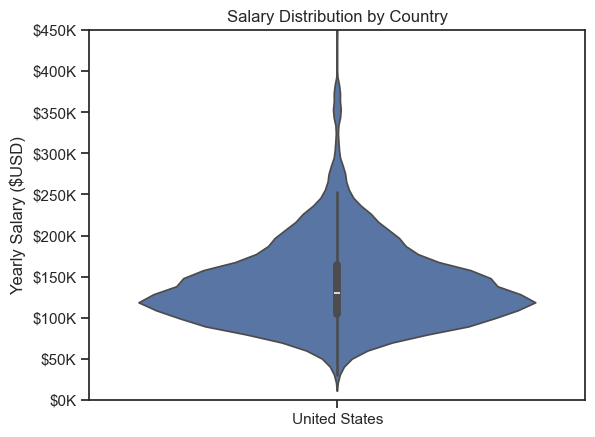

In [102]:
# filter the data to appropriate job titles
df_violin = df[
    (df['job_country'] == 'United States') &
    (df['job_title_short'] == 'Data Scientist')
].dropna(subset=['salary_year_avg']).copy()

sns.violinplot(
    data=df_violin,
    x='job_country',
    y='salary_year_avg'
)

plt.xlabel('')
plt.ylabel('Yearly Salary ($USD)')
plt.title('Salary Distribution by Country')
plt.ylim(0,450000)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
plt.show()